<a href="https://colab.research.google.com/github/prog815/progGA/blob/master/%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генетический поиск параметров линейного уравнения

Проект "Генетическая оптимизация"

https://github.com/prog815/progGA

А.В. Енин

Оренбург - 2020

11.09.2020



# Описание

В настоящем расчете показываем использование библиотеки генетической оптимизации.



# Загружаем библиотеку

Будем использовать библиотеку из проекта [Генетическая оптимизация](https://github.com/prog815/progGA)

In [1]:
! pip install git+https://github.com/prog815/progGA


  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-4nlfkbqc
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-4nlfkbqc
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3627 sha256=787613740319a748e8c14a1cf367390c8437ba7d45ebe5990913790f2dadb071
  Stored in directory: /tmp/pip-ephem-wheel-cache-ubwux0n5/wheels/9c/7a/cc/d1ffa9ccaa42befda21d63d0e01c942a0add5854c37e0bd2ff
Successfully built progGA


In [2]:
from progGA import ListGenetic

# Определяем данные по линейной функции



In [3]:
import numpy as np

# количество примеров для генерации

N = 1000

# генерим входы модели (две переменные)

X = np.random.randn(N)
Y = np.random.randn(N)

# параметры модели

A = 2
B = 4
C = 6

# считаем выход модели

Z = A*X+B*Y+C

# добавляем шум

Z += np.random.randn(N)*0.1

# Запускаем генетический поиск

## функция оптимизации

Модель генетической оптимизации будет предлагать разные параметры. А нам нужно определить функцию для расчета качества по этим параметрам. Эту фнкцию мы передаем модели генетического поиска при создании.

In [4]:
def getQualityMethod(a,b,c):
    z = a*X+b*Y+c
    return -np.sum(np.abs(Z-z))

## создание модели генетического поиска

In [5]:
modelGA = ListGenetic(pop_size=20,
                        a=np.arange(-10,10),
                        b=np.arange(-10,10),
                        c=np.arange(-10,10),
                        quality_method=getQualityMethod)

## запуск генетического поиска

In [6]:
modelGA.fit(1000)


1 {'quality': -11243.865209480693, 'a': 4, 'b': -8, 'c': -1}
2 {'quality': -11243.865209480693, 'a': 4, 'b': -8, 'c': -1}
3 {'quality': -4475.618318919123, 'a': -3, 'b': 6, 'c': 5}
4 {'quality': -10247.60371641831, 'a': -3, 'b': 5, 'c': -4}
5 {'quality': -8505.682584800517, 'a': -6, 'b': 8, 'c': 1}
6 {'quality': -15460.975383573827, 'a': 4, 'b': -8, 'c': -8}
7 {'quality': -14725.75437794502, 'a': 4, 'b': -8, 'c': -7}
8 {'quality': -13721.998027659352, 'a': -2, 'b': -9, 'c': -4}
9 {'quality': -4893.8979254748765, 'a': 4, 'b': 8, 'c': 2}
10 {'quality': -4893.8979254748765, 'a': 4, 'b': 8, 'c': 2}
11 {'quality': -4424.377665713178, 'a': 5, 'b': 6, 'c': 2}
12 {'quality': -4893.8979254748765, 'a': 4, 'b': 8, 'c': 2}
13 {'quality': -2266.7558462429306, 'a': 4, 'b': 6, 'c': 6}
14 {'quality': -4893.8979254748765, 'a': 4, 'b': 8, 'c': 2}
15 {'quality': -10276.370104004976, 'a': -3, 'b': 6, 'c': -4}
16 {'quality': -8090.929025241343, 'a': -6, 'b': 8, 'c': 2}
17 {'quality': -5013.257447378677, 'a

## выводим результаты

1.   Изменение качества
2.   Изменение параметра A
3.   Изменение параметра B
4.   Изменение параметра C

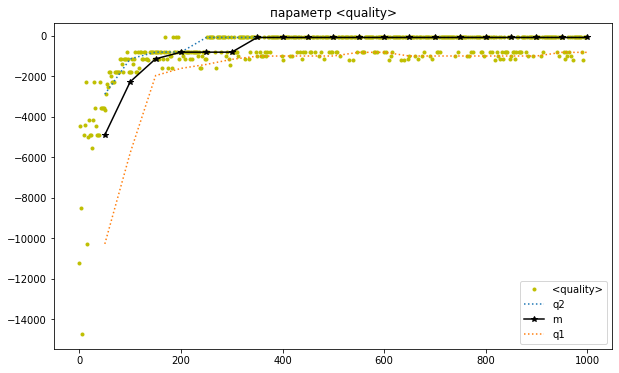

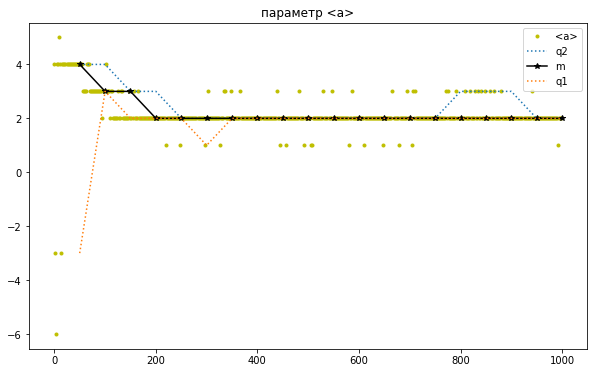

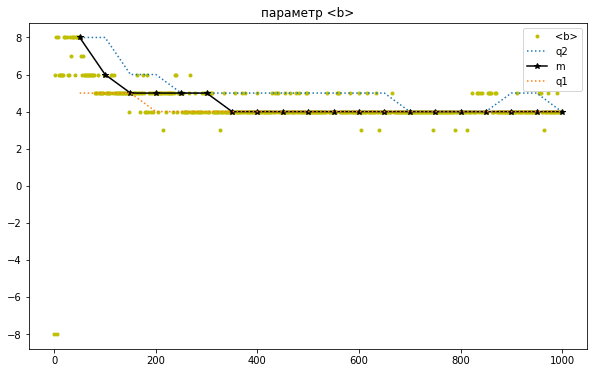

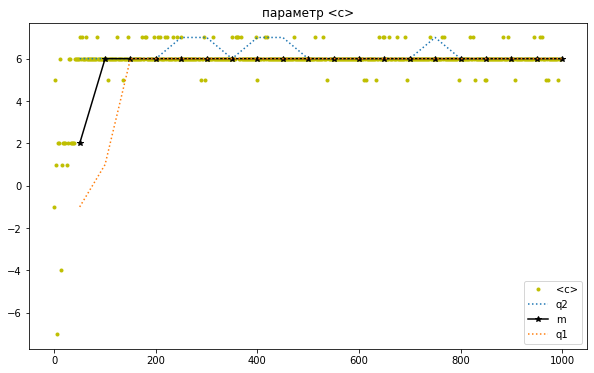

In [7]:
modelGA.plot_hist_new(('quality','a','b','c'))

## Лучшие параметры

In [8]:
modelGA.getBestParams()

{'a': 2, 'b': 4, 'c': 6}

# Выводы

Параметры найдены. Метод работает. Можно применять.